## Chapter_01 - Introduction to Geospatial Vector Data
---
#### Exercise_01 : Restaurants in Paris 

Throughout the exercises in this course, we will work with several datasets about the city of Paris.

In this exercise, we will start with exploring a dataset about the restaurants in the center of Paris (compiled from a Paris Data open dataset). The data contains the coordinates of the point locations of the restaurants and a description of the type of restaurant.

We expect that you are familiar with the basics of the pandas library to work with tabular data (DataFrame objects) in Python. Here, we will use pandas to read the provided csv file, and then use matplotlib to make a visualization of the points. With matplotlib, we first create a figure and axes object with `plt.subplots(),`and then use this axes object ax to create the plot.

#### Instructions
- Import pandas as pd and matplotlib.pyplot as plt.  
- Read the restaurants dataset `("paris_restaurants.csv")` and assign it to a variable called restaurants.  
- Inspect the first 5 rows of the df dataframe with the head() method. Do you see the columns with coordinates?  
- Make a quick visualization of the locations of the districts using the matplotlib `plot()` method.  


In [1]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the restaurants csv file
restaurants = pd.read_csv("paris_restaurants.csv")


In [4]:
# Inspect the first rows of restaurants
print(restaurants.head(5))

                                 type              x             y
0                 European restuarant  259641.691646  6.251867e+06
1       Traditional French restaurant  259572.339603  6.252030e+06
2       Traditional French restaurant  259657.276374  6.252143e+06
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06
4       Traditional French restaurant  259597.943086  6.252230e+06


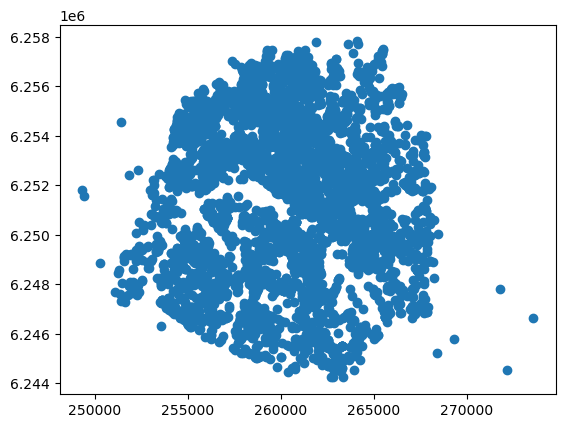

In [5]:
# Assign Coordinates for plotting
x= restaurants['x']
y= restaurants['y']

 # Make a plot of all points
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
plt.show()

#### Exercise_02 : Adding a background map

A plot with just some points can be hard to interpret without any spatial context. Therefore, in this exercise we will learn how to add a background map.

We are going to make use of the contextily package. The add_basemap() function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object to the add_basemap() function. contextily will then download the web tiles needed for the geographical extent of your plot.

To set the size of the plotted points, we can use the markersize keyword of the plot() method.

Pandas has been imported as pd and matplotlib's pyplot functionality as plt.

#### Instructions
- Import contextily.
- Re-do the figure of the previous exercise: make a plot of all the points in restaurant.
- Set the marker size equal to 1 to reduce the size of the points.
- Use the `add_basemap()` function of contextily to add a background map: the first argument is the matplotlib axes object ax.



In [6]:
# Read the restaurants csv file
restaurants = pd.read_csv("paris_restaurants.csv")

In [ ]:
# ! Pip install contextily

In [13]:
# Import contextily
import contextily

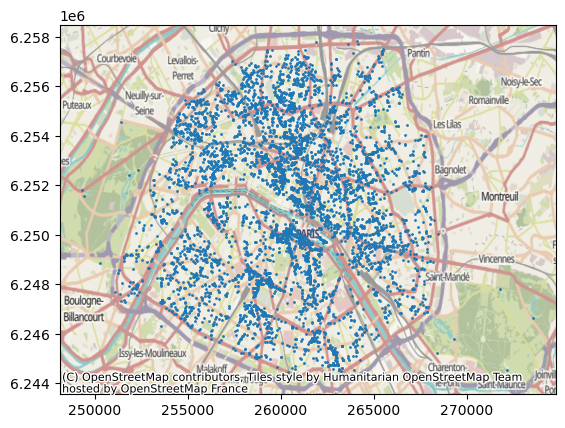

In [14]:
# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants['x'], restaurants['y'], 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

#### Exercise_03 : Explore the Paris districts (I)

In this exercise, we introduce a next dataset about Paris: the administrative districts of Paris (compiled from a Paris Data open dataset)

The dataset is available as a GeoPackage file, a specialised format to store geospatial vector data, and such a file can be read by GeoPandas using the `geopandas.read_file() function`.

To get a first idea of the dataset, we can inspect the first rows with `head()` and do a quick visualization with `plot(). The attribute information about the districts included in the dataset is the district name and the population (total number of inhabitants of each district).

#### Instructions
- Import GeoPandas.
- Read the districts file `('paris_districts.gpkg')` and assign it to a variable called districts.
- Print the first 5 rows of the districts dataset. What kind of geometries do those datasets contain?
- Make a quick visualization of districts.

In [15]:
# Import GeoPandas
import geopandas

In [19]:
# Read the Paris districts dataset
districts = geopandas.read_file('paris_districts.geojson')

In [20]:
# Inspect the first rows
print(districts.head(5))

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...  
1  POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...  
2  POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...  
3  POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...  
4  POLYGON ((2.33632 48.86797, 2.33587 48.867, 2....  


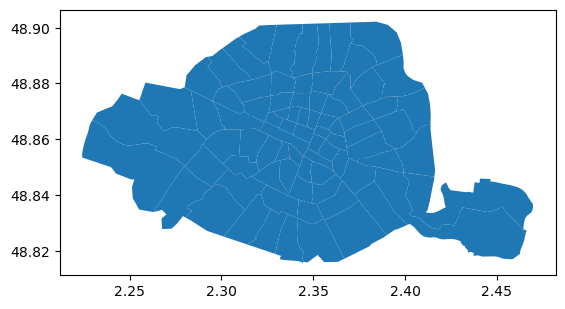

In [21]:
# Make a quick visualization of the districts
districts.plot()
plt.show()

#### Exercise_04 : Explore the Paris districts (II)

In the previous exercise, we used the customized `plot()` method of the GeoDataFrame, which produces a simple visualization of the geometries in the dataset. The GeoDataFrame and GeoSeries objects can be seen as "spatial-aware" DataFrame and Series objects, and compared to their pandas counterparts, they expose additional spatial-specific methods and attributes.

The `.geometry`attribute of a GeoDataFrame always returns the column with the geometry objects as a GeoSeries, whichever the actual name of the column (in the default case it will also be called 'geometry').

Another example of extra spatial functionality is the area attribute, giving the area of the polygons.

GeoPandas has been imported as geopandas and the districts dataset is available as the districts variable.

#### Instructions
- Check what kind of object districts is with the `type()` function.
- Access the geometry attribute of the districts GeoDataFrame and print the type of this object.
- Show the first 5 rows of the geometry.
- Inspect the area of the districts's geometries.


In [22]:
# Check what kind of object districts is
print(type(districts))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [23]:
# Check the type of the geometry attribute
print(type(districts.geometry))

<class 'geopandas.geoseries.GeoSeries'>


In [24]:
# Inspect the first rows of the geometry
print(districts.geometry.head(5))

0    POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...
1    POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...
2    POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...
3    POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...
4    POLYGON ((2.33632 48.86797, 2.33587 48.867, 2....
Name: geometry, dtype: geometry


In [25]:
 # Inspect the area of the districts
print(districts.geometry.area)

0     0.000107
1     0.000051
2     0.000034
3     0.000033
4     0.000023
        ...   
75    0.000159
76    0.000099
77    0.000182
78    0.000196
79    0.000256
Length: 80, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_28384\1818554234.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(districts.geometry.area)


#### Exercise_05 : The Paris restaurants as a GeoDataFrame

In the first coding exercise of this chapter, we imported the locations of the restaurants in Paris from a csv file. To enable the geospatial functionality of GeoPandas, we want to convert the pandas DataFrame to a GeoDataFrame. This can be done with the `GeoDataFrame()` constructor and the `geopandas.points_from_xy()` function, and is done for you.

Now we have a GeoDataFrame, all spatial functionality becomes available, such as plotting the geometries. In this exercise we will make the same figure as in the first exercise with the restaurants dataset, but now using the GeoDataFrame's `plot()` method.

Pandas has been imported as pd, GeoPandas as geopandas and matplotlib's pyplot functionality as plt.

#### Instructions
- Inspect the first rows of the restaurants GeoDataFrame.
- Plot it with the `plot()` method of the GeoDataFrame. The return value is a matplotlib axes object: call this `ax.`
- Again, make sure to set the marker size equal to 1.
- Add a basemap layer using contextily.

In [26]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("paris_restaurants.csv")

In [28]:
# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

In [29]:
# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants.head(1))

                  type              x             y  \
0  European restuarant  259641.691646  6.251867e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  


In [ ]:
# Make a plot of the restaurants
ax = restaurants.plot(markersize=1)

In [ ]:
# import contextily
contextily.add_basemap(ax)
plt.show()

#### Exercise_06 : Visualizing the population density

Let's get back to the districts dataset. In a previous exercise we visualized the districts with a uniform column. But often we want to show the spatial variation of a variable, and color the polygons accordingly.

In this exercise we will visualize the spatial variation of the population density within the center of Paris. For this, we will first calculate the population density by dividing the population number with the area, and add it as a new column to the dataframe.

The districts dataset is already loaded as districts, GeoPandas has been imported as geopandas and matplotlib.pyplot as plt.

#### Instructions
- Print the first rows of the districts dataset. Do you see the `'population'` column?
- Inspect the area of the districts's geometries.
- Add a column 'population_density' representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
- Plot the districts using the `'population_density'` to color the polygons.

In [ ]:
# Inspect the first rows of the districts dataset
print(districts.head(5))

In [ ]:
# Inspect the area of the districts
print(districts.area)

In [ ]:
# Add a population density column
districts['population_density'] = districts['population'] / districts.area * 10**6

In [ ]:
# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

#### Exercise_07 : Using pandas functionality: groupby

This course will focus on the spatial functionality of GeoPandas, but don't forget that we still have a dataframe, and all functionality you know from Pandas is still applicable.

In this exercise, we will recap a common functionality: the groupby operation. You may want to use this operation when you have a column containing groups, and you want to calculate a statistic for each group. In the `groupby()` method, you pass the column that contains the groups. On the resulting object, you can then call the method you want to calculate for each group. In this exercise, we want to know the size of each group of type of restaurants.

We refer to the course on Manipulating DataFrames with pandas for more information and exercises on this `groupby` operation.

#### Instructions
- Using `groupby()`, group the restaurants by the type of restaurants, and calculate the size of each group. Call the result `type_counts`.
- Print the resulting Series.

In [ ]:
# Load the restaurants data
restaurants = geopandas.read_file("paris_restaurants.geosjon")

In [ ]:
print(restaurants)

In [ ]:
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

In [ ]:
# Print the result
print(type_counts)

#### Exercise_08 : Plotting multiple layers

Another typical pandas functionality is filtering a dataframe: taking a subset of the rows based on a condition (which generates a boolean mask).

In this exercise, we will take the subset of all African restaurants, and then make a multi-layered plot. In such a plot, we combine the visualization of several GeoDataFrames on a single figure. To add one layer, we can use the ax keyword of the `plot()` method of a GeoDataFrame to pass it a matplotlib axes object.

The restaurants data is already loaded as the restaurants GeoDataFrame. GeoPandas is imported as geopandas and matplotlib.pyplot as plt.

#### Instructions
- Select a subset of all rows where the type is `'African restaurant'`. Call this subset african_restaurants.
- Make a plot of all restaurants and use a uniform `grey` color. Remember to pass a matplotlib axes object to the `plot()` method.
- Add a second layer of only the `African restaurants` in red. For the typical colors, you can use English names such as `'red' and 'grey'`.
- Remove the box using the `set_axis_off()` method on the matplotlib axes object.

In [ ]:
# Load the restaurants dataset
restaurants = geopandas.read_file("paris_restaurants.geosjon")

In [ ]:
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type'] == 'African restaurant']

In [ ]:
# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color='grey',markersize=1)
african_restaurants.plot(ax=ax, color='red', markersize=2)

In [ ]:
# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()